In [3]:
# Import necessary libraries
import pandas as pd

# File paths (replace these with the paths to your uploaded files if different)
cn_file_path = 'pennines_CN.csv'  # Channel network file
sinuosity_file_path = 'pennines_sin_grad_le_fil.csv'  # Sinuosity data file

# Load the data
cn_data = pd.read_csv(cn_file_path)
sinuosity_data = pd.read_csv(sinuosity_file_path)

# Display the first few rows of the datasets
print("Channel Network Data:")
display(cn_data.head())

print("\nSinuosity Data:")
display(sinuosity_data.head())

# Extract relevant junctions from the sinuosity file
sinuosity_junctions = sinuosity_data['junction'].unique()

# Filter the channel network to include only rows where Junction Index or receiver_JI matches the sinuosity junctions
filtered_cn = cn_data[(cn_data['Junction Index'].isin(sinuosity_junctions)) |
                      (cn_data['receiver_JI'].isin(sinuosity_junctions))]

# Display the filtered dataset and its size
print(f"\nFiltered Channel Network contains {filtered_cn.shape[0]} rows.")
display(filtered_cn.head())

# Merge sinuosity data into the filtered channel network using Junction Index to match upstream junctions
merged_data = filtered_cn.merge(
    sinuosity_data[['junction', 'sinuosity', 'gradient', 'drainage_area', 'elevation', 'flow_distance', 'm_chi', 'LE', 'most_common_rocktype_id', 'RCS_D']],
    left_on='Junction Index',
    right_on='junction',
    how='left')

# Check for missing sinuosity values in the merged data
missing_sinuosity = merged_data['sinuosity'].isnull().sum()
missing_gradient = merged_data['gradient'].isnull().sum()
print(f"\nNumber of missing sinuosity values after merging: {missing_sinuosity}")
print(f"\nNumber of missing gradient values after merging: {missing_gradient}")

# Display a preview of the merged data
print("\nMerged Data:")
display(merged_data.head())

# Save the merged data to a CSV file for further inspection or visualization
output_file = 'pennines_segmented_sin_grad_filtered.csv'
merged_data.to_csv(output_file, index=False)
print(f"\nMerged data saved to {output_file}.")


Channel Network Data:


,latitude,longitude,Junction Index,Stream Order,NI,receiver_NI,receiver_JI
0,55.158764,-1.732027,0,1,66957,66956,1
1,55.158765,-1.732106,0,1,66956,63868,1
2,55.158811,-1.732182,0,1,63868,63867,1
3,55.158812,-1.732261,0,1,63867,60849,1
4,55.158857,-1.732338,0,1,60849,60848,1



Sinuosity Data:


,Unnamed: 0,junction,node,x,y,latitude,longitude,stream_order,receiver_junction,geometry,...,source_key,basin_key,segmented_elevation,dist,sinuosity,gradient,Junction Index,most_common_rocktype_id,RCS_D,LE
0,0,303,17035626,525157.5,6108312.5,55.120866,-2.605533,1,304,POINT (-2.60553295 55.1208665),...,414,6,399.65,0.0,1.214338,0.045051,303,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE",0.552381
1,1,304,20323241,525907.5,6107467.5,55.113235,-2.593850,2,305,POINT (-2.59385039 55.1132346),...,414,6,349.38,0.0,1.529532,0.033438,304,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE",0.552381
2,2,305,26518767,526587.5,6105882.5,55.098956,-2.583339,3,306,POINT (-2.58333861 55.0989558),...,413,6,291.36,0.0,1.313506,0.009501,305,650.0,SANDSTONE AND MUDSTONE,0.552381
3,3,306,27836136,526842.5,6105547.5,55.095932,-2.579374,3,307,POINT (-2.57937415 55.0959317),...,413,6,287.50,0.0,1.701210,0.010288,306,650.0,SANDSTONE AND MUDSTONE,0.552381
4,4,307,27285279,527212.5,6105687.5,55.097170,-2.573563,3,308,POINT (-2.57356298 55.0971696),...,413,6,283.03,0.0,1.379763,0.007648,307,650.0,SANDSTONE AND MUDSTONE,0.552381



Filtered Channel Network contains 417274 rows.


,latitude,longitude,Junction Index,Stream Order,NI,receiver_NI,receiver_JI
86359,55.120866,-2.605533,303,1,17035626,17035627,304
86360,55.120866,-2.605455,303,1,17035627,17035628,304
86361,55.120866,-2.605376,303,1,17035628,17035629,304
86362,55.120866,-2.605298,303,1,17035629,17055065,304
86363,55.120821,-2.605220,303,1,17055065,17055066,304



Number of missing sinuosity values after merging: 14375

Number of missing gradient values after merging: 14375

Merged Data:


,latitude,longitude,Junction Index,Stream Order,NI,receiver_NI,receiver_JI,junction,sinuosity,gradient,drainage_area,elevation,flow_distance,m_chi,LE,most_common_rocktype_id,RCS_D
0,55.120866,-2.605533,303,1,17035626,17035627,304,303,1.214338,0.045051,1250100.0,399.89,99482.0,26.869,0.552381,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE"
1,55.120866,-2.605455,303,1,17035627,17035628,304,303,1.214338,0.045051,1250100.0,399.89,99482.0,26.869,0.552381,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE"
2,55.120866,-2.605376,303,1,17035628,17035629,304,303,1.214338,0.045051,1250100.0,399.89,99482.0,26.869,0.552381,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE"
3,55.120866,-2.605298,303,1,17035629,17055065,304,303,1.214338,0.045051,1250100.0,399.89,99482.0,26.869,0.552381,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE"
4,55.120821,-2.605220,303,1,17055065,17055066,304,303,1.214338,0.045051,1250100.0,399.89,99482.0,26.869,0.552381,30.0,"LIMESTONE, SANDSTONE, SILTSTONE AND MUDSTONE"



Merged data saved to pennines_segmented_sin_grad_filtered.csv.


In [4]:
# Import libraries for geospatial data
import geopandas as gpd
from shapely.geometry import LineString

# Create line geometries for the channel segments
def create_line_geometry(row):
    # Define a line from the start (Junction Index) to the end (receiver_JI)
    return LineString([(row['longitude'], row['latitude']), 
                       (row['longitude_receiver'], row['latitude_receiver'])])

# Add receiver coordinates to the filtered channel network
# (Assumes 'receiver_NI' corresponds to rows in the channel network for receiver nodes)
merged_data = merged_data.merge(
    cn_data[['NI', 'latitude', 'longitude']],
    left_on='receiver_NI',
    right_on='NI',
    suffixes=('', '_receiver'),
    how='left')

# Apply the line geometry creation
merged_data['geometry'] = merged_data.apply(create_line_geometry, axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry', crs="EPSG:4326")

# Save as a shapefile for visualization in GIS software
output_shapefile = 'pennines_segmented_grad_sin_filtered.shp'
gdf.to_file(output_shapefile)
print(f"\nGeoDataFrame saved as shapefile: {output_shapefile}")


/tmp/ipykernel_400/678655368.py:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)



GeoDataFrame saved as shapefile: pennines_segmented_grad_sin_filtered.shp


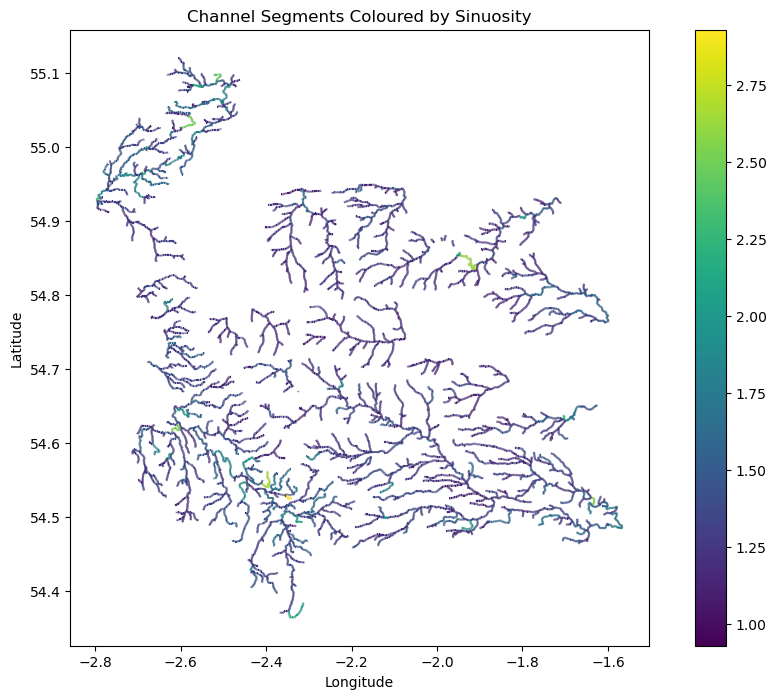

In [10]:
# test of graph
import matplotlib.pyplot as plt
gdf.plot(column='sinuosity', cmap='viridis', legend=True, figsize=(12, 8))
plt.title("Channel Segments Coloured by Sinuosity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()